In [114]:
import numpy as np
from scipy.optimize import linprog
import pandas as pd
import cvxpy as cp
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [115]:
df=pd.read_excel('markowitz_dataset.xlsx')

In [116]:
df.head()

,N°DPE,secteur_activite,asset_type_cre,Emission_GES_kgCO2_m2_an,Etiquette_GES,taux_credit
0,2478T0226264E,locaux d'entreprise (bureaux),"Bâtiment à usage principale de bureau, d'admin...",6.9,B,0.02
1,2394T1781959E,locaux d'entreprise (bureaux),"Bâtiment à usage principale de bureau, d'admin...",6.1,B,0.02
2,2413T2148090B,locaux d'entreprise (bureaux),"Bâtiment à usage principale de bureau, d'admin...",9.2,B,0.02
3,2372T2176472X,U : Établissements de soins,Bâtiment à occupation continue (par exemple: h...,7.0,B,0.02
4,2482T2044916M,"W : Administrations, banques, bureaux","Bâtiment à usage principale de bureau, d'admin...",3.1,A,0.01


In [117]:
R=np.array(df['taux_credit'].tolist())
GES=np.array(df['Emission_GES_kgCO2_m2_an'].tolist())


In [118]:
len(R)

278

In [119]:
R_new=(R-R.min())/(R.max()-R.min())
GES_new=(GES-GES.min())/(GES.max()-GES.min())

In [120]:
def optimize(alpha=10,lamda=0.001):
    # Définition de la variable d'optimisation (proportions d'investissement)
    x = cp.Variable(len(R), nonneg=True)  # x ≥ 0
    # Fonction objectif
    objective = cp.Maximize(cp.sum((R_new**2 -lamda*GES_new) * x) - alpha * cp.sum_squares(x))

    # Contraintes
    constraints = [cp.sum(x) == 1]  # Somme des proportions = 1

    # Résolution du problème quadratique
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Affichage des résultats
    if problem.status == 'optimal':
        proportion=x.value
        return proportion
    else:
        print("Échec de l'optimisation")



In [121]:
proportion=optimize(alpha=10)

c:\Users\marie\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 10429 times so far.

  warnings.warn(msg, UserWarning)


In [122]:
proportion.max()

0.0473427833706039

In [123]:
proportion.min()

0.0

In [ ]:
print(f'the investment was in {(proportion>proportion.min()).sum()} building')

the investment was in 97 building


In [125]:
print(f'the gain is {(proportion*R).sum()*100:.3}%')

the gain is 5.19%


In [155]:
alpha=np.linspace(0.1,100,1000)
gain=[(optimize(alpha=alpha_i)*R).sum() for alpha_i in alpha]
number_of_buildings=[(optimize(alpha=alpha_i)>0.00001).sum() for alpha_i in alpha]
total_ges=[GES[optimize(alpha=alpha_i)>0.00001].sum() for alpha_i in alpha]

c:\Users\marie\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 15451 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\marie\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 15452 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\mar

Text(0, 0.5, 'gain')

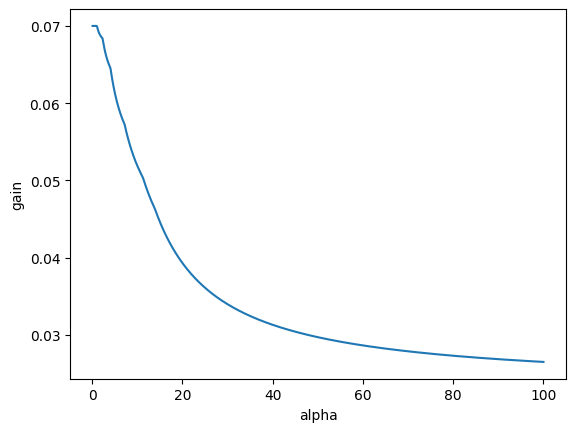

In [142]:
plt.plot(alpha,gain)
plt.xlabel('alpha')
plt.ylabel('gain')

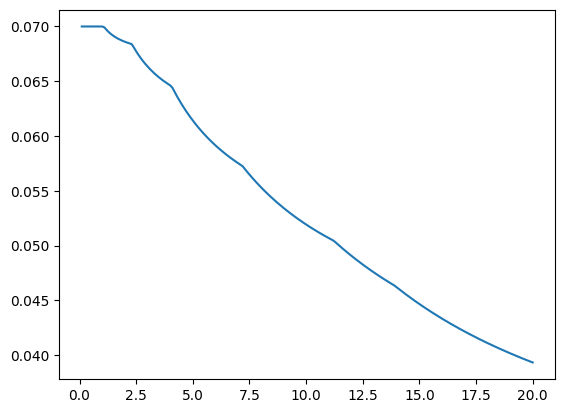

In [143]:
plt.plot(alpha[:200],gain[:200])

Text(0, 0.5, 'total_ges')

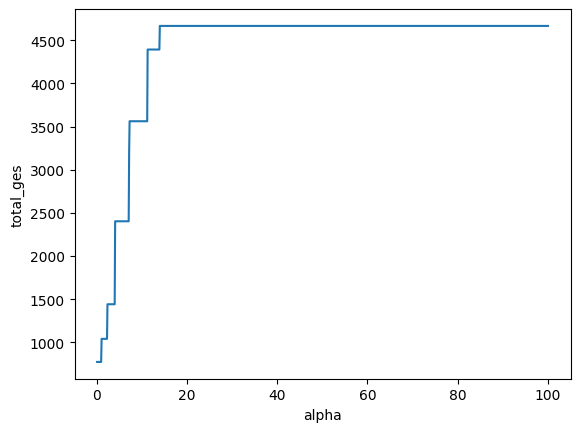

In [158]:
plt.plot(alpha,total_ges)
plt.xlabel('alpha')
plt.ylabel('total_ges')

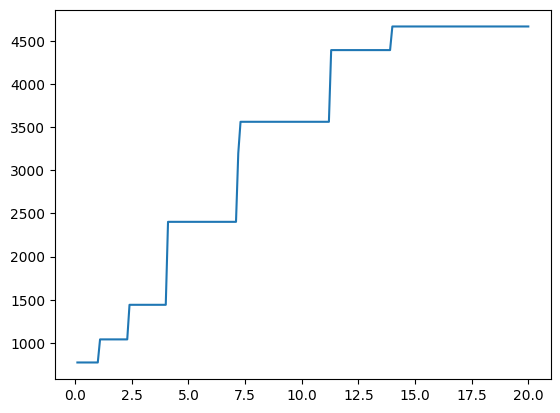

In [159]:
plt.plot(alpha[:200],total_ges[:200])

Text(0, 0.5, 'number_of_buildings')

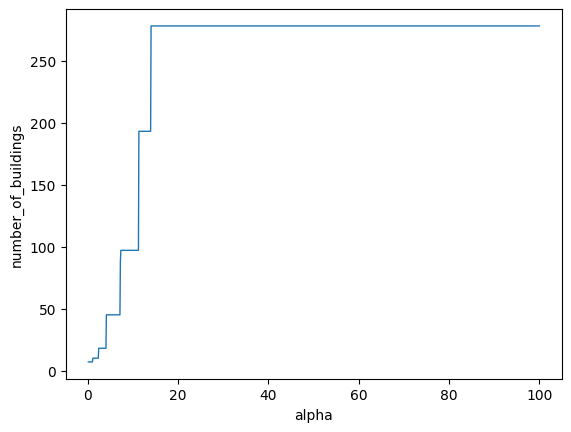

In [144]:
plt.plot(alpha,number_of_buildings,linewidth=1)
plt.xlabel('alpha')
plt.ylabel('number_of_buildings')

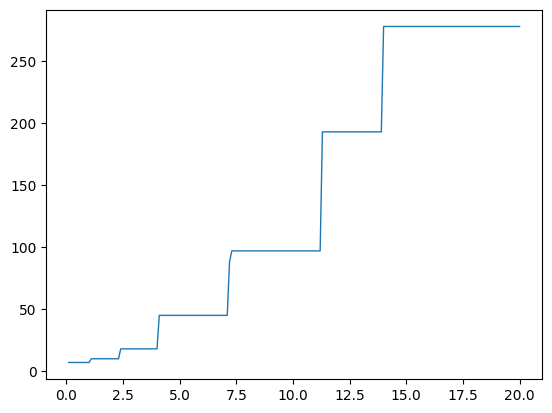

In [145]:
plt.plot(alpha[:200],number_of_buildings[:200],linewidth=1)

In [161]:
#it seems that alpha = 5 is the best
proportion=optimize(alpha=5)

c:\Users\marie\anaconda3\Lib\site-packages\cvxpy\expressions\expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 18451 times so far.

  warnings.warn(msg, UserWarning)


In [172]:
print(f'the investment was in {(proportion>0.00001).sum()} building')
print(f'the gain is {(proportion*R).sum()*100:.2f} %')
print(f'total ges is {GES[proportion>0.00001].sum():.2f}')

the investment was in 45 building
the gain is 6.14 %
total ges is 2402.30


### we can repeat this process according to lamda and try to choose the best lamda also